<a href="https://colab.research.google.com/github/vinayak2709/machine-Learning/blob/master/humanDetectionBasic_HOGDescriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

absence of human


-1

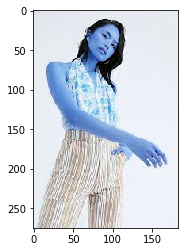

In [41]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# construct the argument parse and parse the arguments

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


# loop over the image paths
# load the image and resize it to (1) reduce detection time
# and (2) improve detection accuracy


# image = cv2.imread('nature.jpg')

# image = cv2.imread('download.jpg')


# image = cv2.imread('images (4).jpg')

image = cv2.imread('images (6).jpg')





image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()

# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
  padding=(8, 8), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
  cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)


if(len(pick) == 0):print("absence of human")

else:print("human present",len(pick))
  
  
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
  cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

# show some information on the number of bounding boxes

# show the output images

# cv2.imshow(orig)              #for gpu 

# cv2.imshow(image)             #for gpu


plt.imshow(orig)                #for Google colab

plt.imshow(image)
cv2.waitKey(0)